In [1]:
from dbo.simulator.TestFunctions import *
from dbo.acquisition.DEI import DiverseExpectedImprovement
from dbo.tester.Tester import *
from dbo.metrics.ExperimentMetric import *
from botorch.acquisition import ExpectedImprovement
from dbo.plotter.Plotter import *

/Users/bennysun/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
test = Tester(10, 10, 10)
branin = Branin2DSimulator('id')
griewank = Griewank2DSimulator('id')
simulator_list = [branin, griewank]

acquisition_list = [(DiverseExpectedImprovement, {'lambda_':0.5, 'epsilon_':0.05}), 
                    (ExpectedImprovement, {})]

experiment_list = test.perform_known_experiment(2, simulator_list, acquisition_list)

In [3]:
experiment_metric = ExperimentMetrics()
df = experiment_metric.get_dataframe(experiment_list, 0.4)

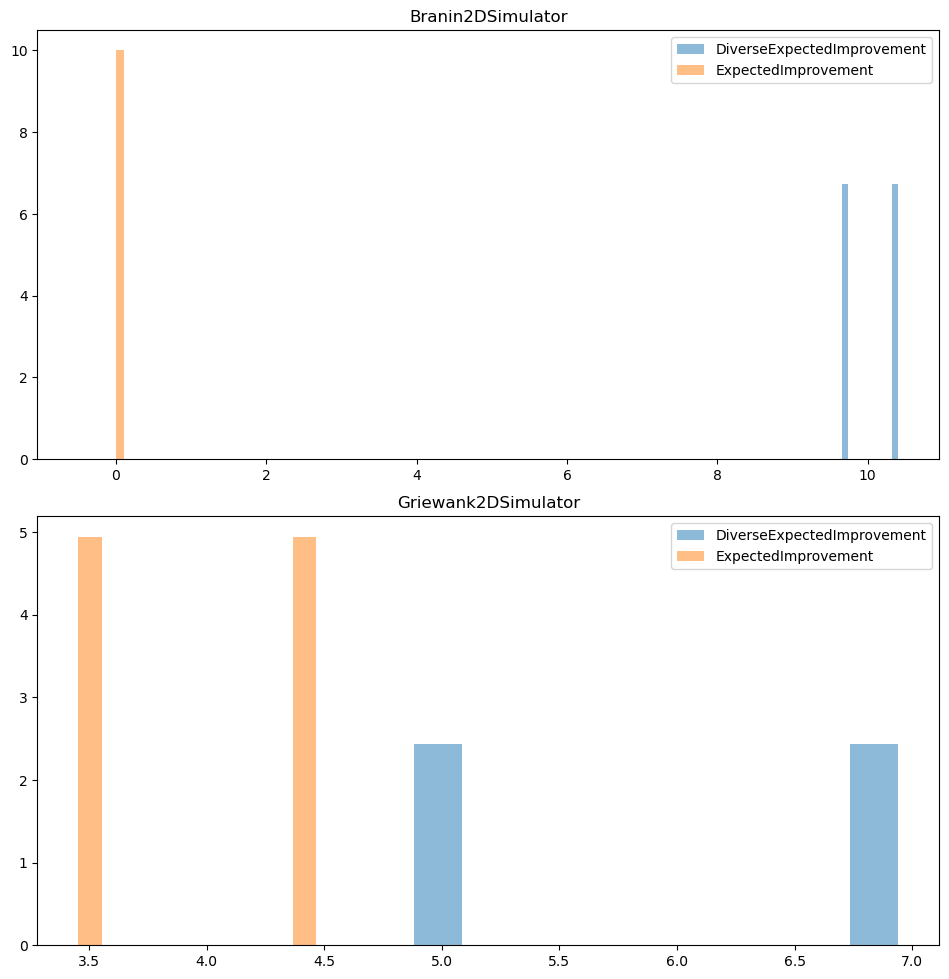

In [4]:
plotter = Plotter(experiment_list, 0.4)
plotter.plot_feature('avg_dist')

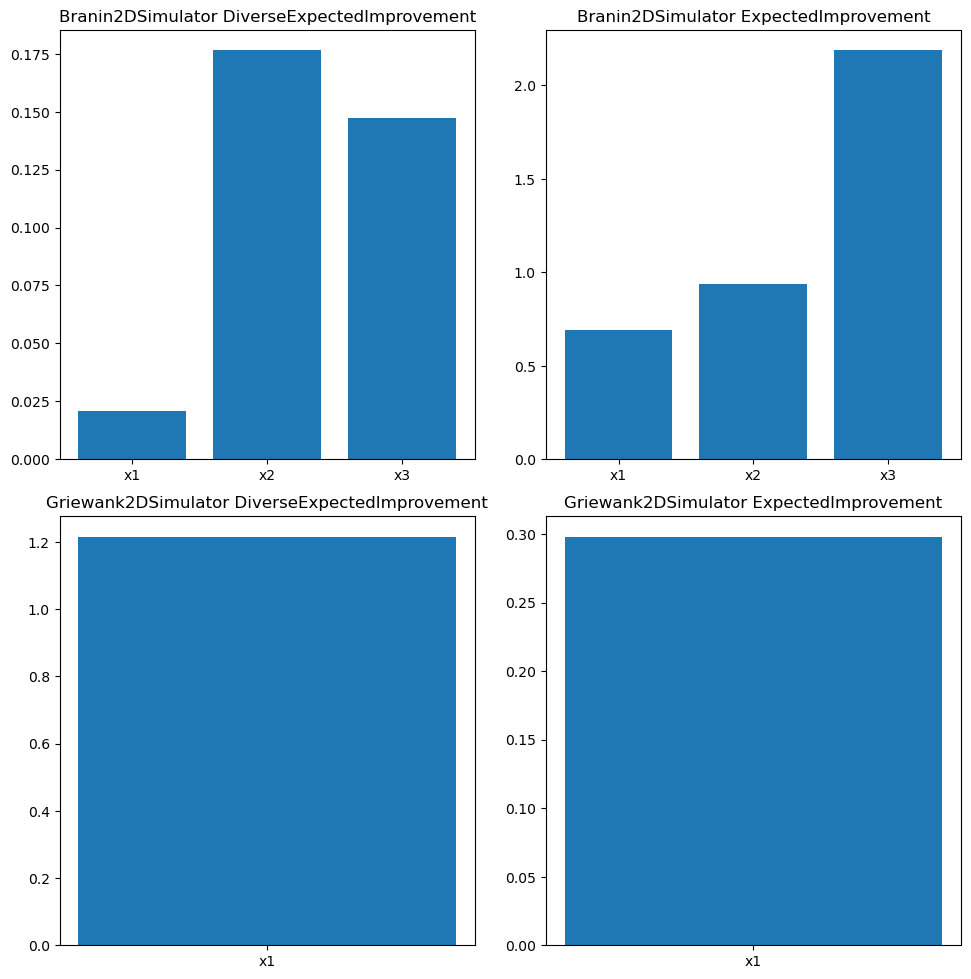

In [5]:
minima = {
    'Branin2DSimulator':[np.array([-3.14, 12.275]), np.array([3.14, 2.275]), np.array([9.42, 2.475])],
    'Griewank2DSimulator':[np.array([0, 0])],
}

plotter.plot_local_minima(minima)